In [1]:
#import data
import pandas as pd
df = pd.read_csv("heart_2020_cleaned.csv")
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [2]:
#make them into all numerical, data cleaning, in order to use PCA
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
df = df.replace("Yes",1)
df = df.replace("No",0)
df = df.replace("Yes (during pregnancy)",2)
df = df.replace("No, borderline diabetes",3)
df = df.replace("Female",0)
df = df.replace("Male",1)
df = df.replace("18-24",0)
df = df.replace("25-29",1)
df = df.replace("30-34",2)
df = df.replace("35-39",3)
df = df.replace("40-44",4)
df = df.replace("45-49",5)
df = df.replace("50-54",6)
df = df.replace("55-59",7)
df = df.replace("60-64",8)
df = df.replace("65-69",9)
df = df.replace("70-74",10)
df = df.replace("75-79",11)
df = df.replace("80 or older",12)
df = df.replace("Very good",3)
df = df.replace("Good",2)
df = df.replace("Fair",1)
df = df.replace("Poor",0)
df = df.replace("Excellent",4)
df = df.replace("Asian",0)
df = df.replace("Black",1)
df = df.replace("Hispanic",2)
df = df.replace("White",3)
df = df.replace("Other",4)
df = df.replace("American Indian/Alaskan Native",5)

i = 0
df['BMI'][0]
while i < len(df['BMI']):
    if df['BMI'][i] <= 18.5 and  df['BMI'][i] >5:
        df = df.replace(df['BMI'][i],0)
    if df['BMI'][i] <= 24.9 and df['BMI'][i] > 18.5:
        df = df.replace(df['BMI'][i],1)
    if df['BMI'][i] <= 29.9 and df['BMI'][i] > 24.9:
        df = df.replace(df['BMI'][i],2)
    if df['BMI'][i] >29.9:
        df = df.replace(df['BMI'][i],3)
    i=i+1
             
df


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.0,1,0,0,3.0,3.0,0,0,7,3,1,1,3,5.0,1,0,1
1,0,1.0,0,0,1,0.0,0.0,0,0,12,3,0,1,3,7.0,0,0,0
2,0,2.0,1,0,0,1.0,3.0,0,1,9,3,1,1,1,8.0,1,0,0
3,0,1.0,0,0,0,0.0,0.0,0,0,11,3,0,0,2,6.0,0,0,1
4,0,1.0,0,0,0,2.0,0.0,1,0,4,3,0,1,3,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,2.0,1,0,0,7.0,0.0,1,1,8,2,1,0,1,6.0,1,0,0
319791,0,2.0,1,0,0,0.0,0.0,0,1,3,2,0,1,3,5.0,1,0,0
319792,0,1.0,0,0,0,0.0,0.0,0,0,5,2,0,1,2,6.0,0,0,0
319793,0,3.0,0,0,0,0.0,0.0,0,0,1,2,0,0,2,12.0,0,0,0


value:  100.0


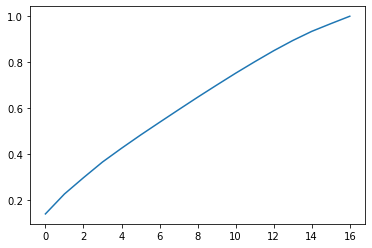

In [3]:
#PCA(to select 'x' attributes)-the method prof. mentioned in week 9
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

arrayfactors = df.copy().drop(columns=['HeartDisease'],axis=1)
arrayfactors_scaled = StandardScaler().fit_transform(arrayfactors)

pca= PCA(n_components = 17, random_state = 21)
pca.fit_transform(arrayfactors_scaled)

print("value: ", sum(pca.explained_variance_ratio_ * 100))
# polynomial plot for PCA 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
# From this plot we can see PCA is not a good choice for selecting our data.

In [4]:
# after we cleaned our data, out data is all float or int nums.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

<AxesSubplot:>

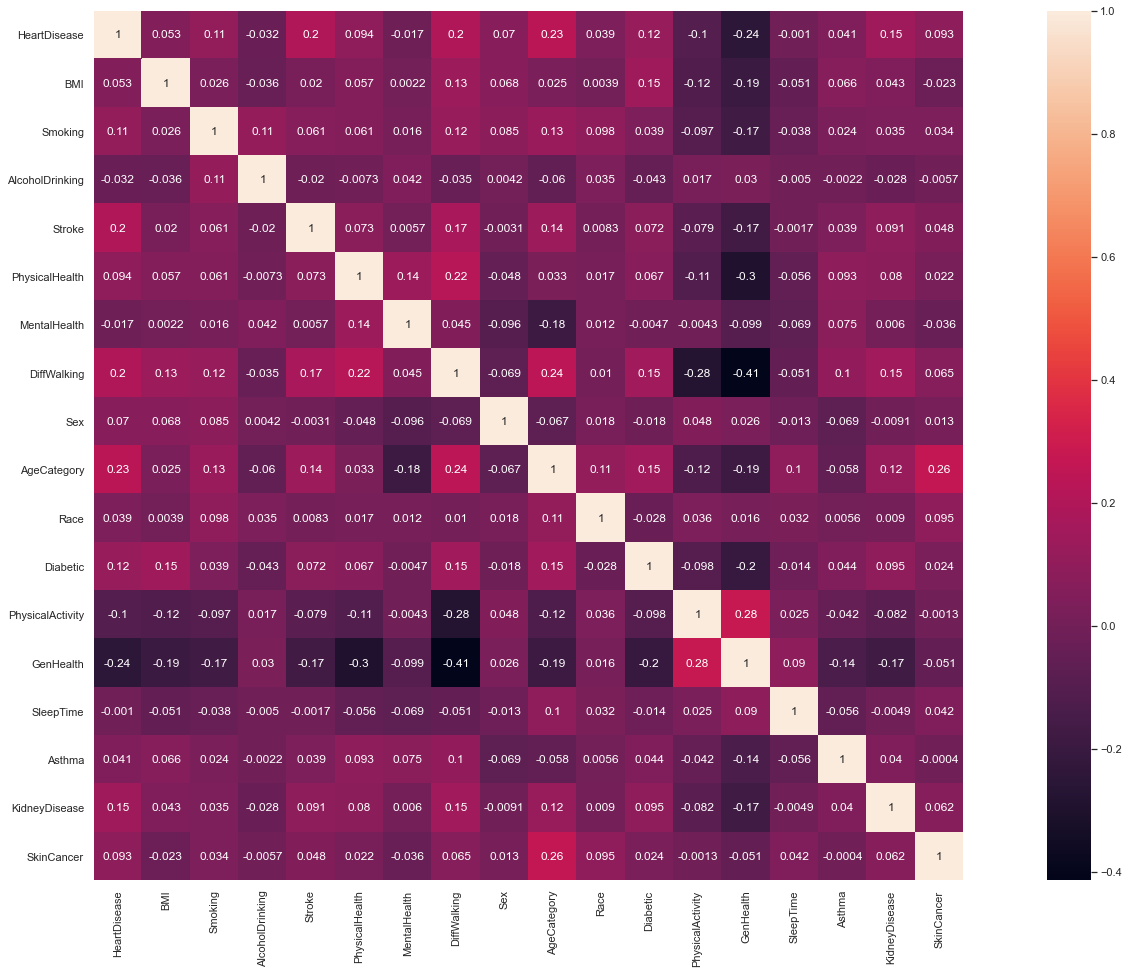

In [5]:
#heatmap for all attributes
import seaborn as sns
sns.set(rc = {'figure.figsize':(30,16)})
sns.heatmap(df.corr(),annot=True,square=True)

In [6]:
# #since PCA is not working(PCA tells us to use almost all attributes-> that's too many), 
# #we used heatmap and decided to drop some attributes that 
# #have large correlation(to be independent)

# sns.set(rc = {'figure.figsize':(30,16)})
# sns.heatmap(df1.corr(),annot=True,square=True)


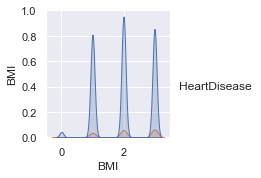

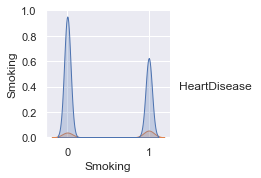

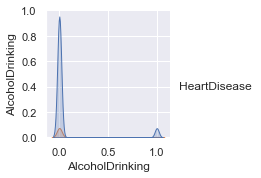

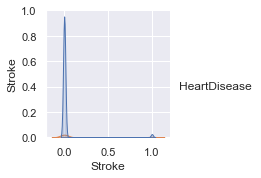

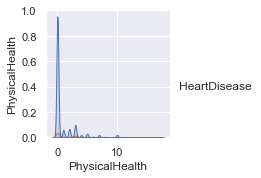

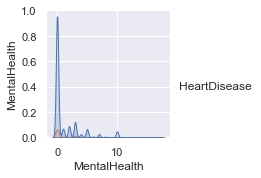

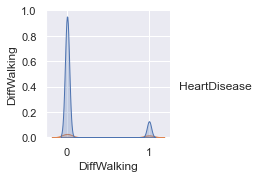

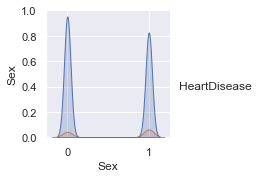

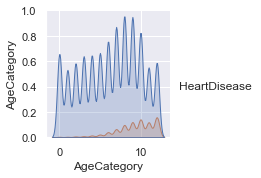

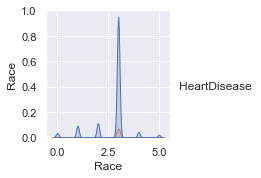

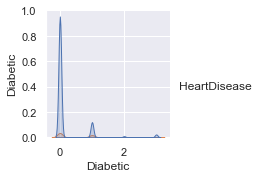

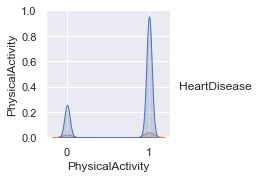

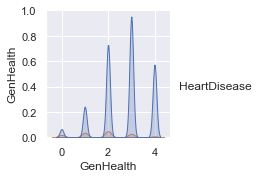

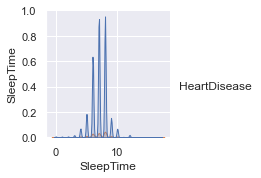

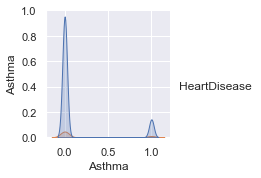

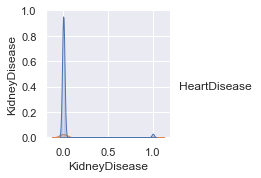

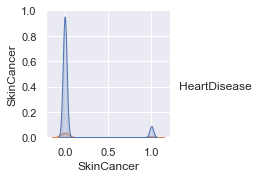

In [7]:
#pairplot for visualization about HeartDisease and other attributes
sns.pairplot(data=df,hue='HeartDisease',
             # Variables within data to use
             vars=['BMI'],
             # Use kde for the diagonal subplots
             diag_kind='kde',
             plot_kws=dict(
                 size=.5,
                 alpha=.5,
             ))

sns.pairplot(data=df,hue='HeartDisease',
             # Variables within data to use
             vars=['Smoking'],
             # Use kde for the diagonal subplots
             diag_kind='kde',
             plot_kws=dict(
                 size=.5,
                 alpha=.5,
             ))
sns.pairplot(data=df,hue='HeartDisease',
             # Variables within data to use
             vars=['AlcoholDrinking'],
             # Use kde for the diagonal subplots
             diag_kind='kde',
             plot_kws=dict(
                 size=.5,
                 alpha=.5,
             ))

sns.pairplot(data=df,hue='HeartDisease',
             # Variables within data to use
             vars=['Stroke'],
             # Use kde for the diagonal subplots
             diag_kind='kde',
             plot_kws=dict(
                 size=.5,
                 alpha=.5,
             ))

sns.pairplot(data=df,hue='HeartDisease',
             # Variables within data to use
             vars=['PhysicalHealth'],
             # Use kde for the diagonal subplots
             diag_kind='kde',
             plot_kws=dict(
                 size=.5,
                 alpha=.5,
             ))

sns.pairplot(data=df,hue='HeartDisease',
             # Variables within data to use
             vars=['MentalHealth'],
             # Use kde for the diagonal subplots
             diag_kind='kde',
             plot_kws=dict(
                 size=.5,
                 alpha=.5,
             ))

sns.pairplot(data=df,hue='HeartDisease',
             # Variables within data to use
             vars=['DiffWalking'],
             # Use kde for the diagonal subplots
             diag_kind='kde',
             plot_kws=dict(
                 size=.5,
                 alpha=.5,
             ))

sns.pairplot(data=df,hue='HeartDisease',
             # Variables within data to use
             vars=['Sex'],
             # Use kde for the diagonal subplots
             diag_kind='kde',
             plot_kws=dict(
                 size=.5,
                 alpha=.5,
             ))

sns.pairplot(data=df,hue='HeartDisease',
             # Variables within data to use
             vars=['AgeCategory'],
             # Use kde for the diagonal subplots
             diag_kind='kde',
             plot_kws=dict(
                 size=.5,
                 alpha=.5,
             ))

sns.pairplot(data=df,hue='HeartDisease',
             # Variables within data to use
             vars=['Race'],
             # Use kde for the diagonal subplots
             diag_kind='kde',
             plot_kws=dict(
                 size=.5,
                 alpha=.5,
             ))
sns.pairplot(data=df,hue='HeartDisease',
             # Variables within data to use
             vars=['Diabetic'],
             # Use kde for the diagonal subplots
             diag_kind='kde',
             plot_kws=dict(
                 size=.5,
                 alpha=.5,
             ))

sns.pairplot(data=df,hue='HeartDisease',
             # Variables within data to use
             vars=['PhysicalActivity'],
             # Use kde for the diagonal subplots
             diag_kind='kde',
             plot_kws=dict(
                 size=.5,
                 alpha=.5,
             ))

sns.pairplot(data=df,hue='HeartDisease',
             # Variables within data to use
             vars=['GenHealth'],
             # Use kde for the diagonal subplots
             diag_kind='kde',
             plot_kws=dict(
                 size=.5,
                 alpha=.5,
             ))
sns.pairplot(data=df,hue='HeartDisease',
             # Variables within data to use
             vars=['SleepTime'],
             # Use kde for the diagonal subplots
             diag_kind='kde',
             plot_kws=dict(
                 size=.5,
                 alpha=.5,
             ))

sns.pairplot(data=df,hue='HeartDisease',
             # Variables within data to use
             vars=['Asthma'],
             # Use kde for the diagonal subplots
             diag_kind='kde',
             plot_kws=dict(
                 size=.5,
                 alpha=.5,
             ))

sns.pairplot(data=df,hue='HeartDisease',
             # Variables within data to use
             vars=['KidneyDisease'],
             # Use kde for the diagonal subplots
             diag_kind='kde',
             plot_kws=dict(
                 size=.5,
                 alpha=.5,
             ))

sns.pairplot(data=df,hue='HeartDisease',
             # Variables within data to use
             vars=['SkinCancer'],
             # Use kde for the diagonal subplots
             diag_kind='kde',
             plot_kws=dict(
                 size=.5,
                 alpha=.5,
             ))


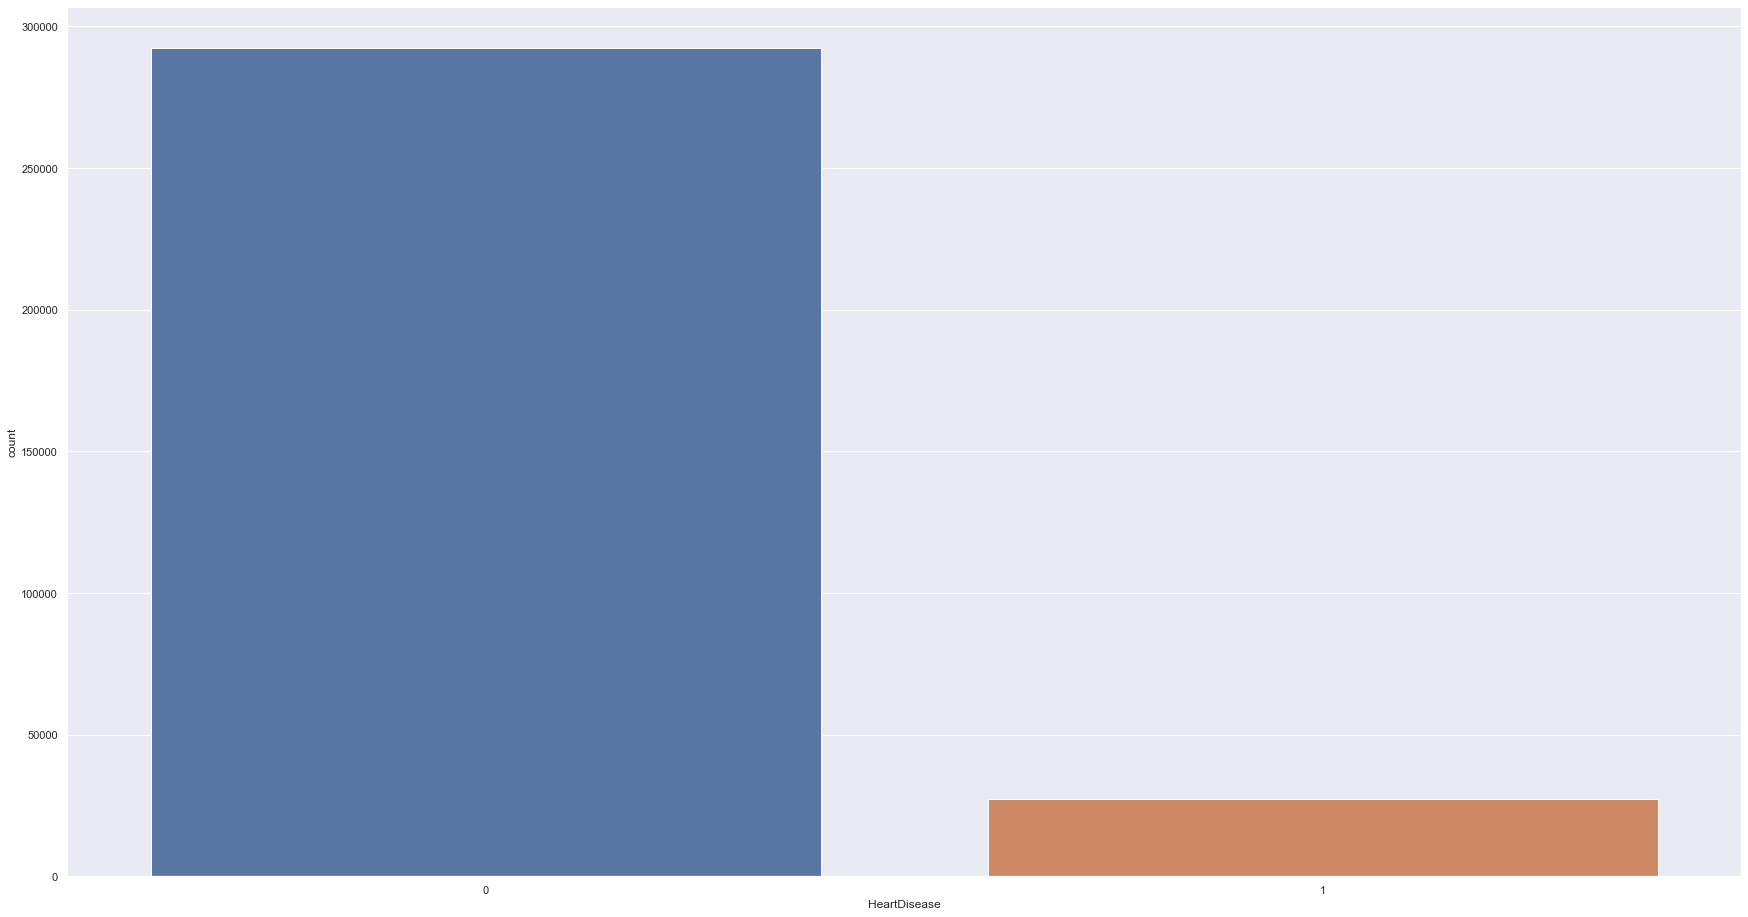

In [8]:
df1=df
sns.countplot(x='HeartDisease',data=df1)
plt.show()

In [9]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
df1=df1.sample(n=60000)
X=df1.drop(columns=['HeartDisease'],axis=1)
y=df1['HeartDisease']
#numbers before smote
num_before_smote = dict(Counter(y))

#applying SMOTE to data 
oversampling = SMOTE(sampling_strategy=0.8)
undersampling = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', oversampling), ('u', undersampling)]
pipeline = Pipeline(steps=steps)
X_smote, y_smote = pipeline.fit_resample(X, y)

#numbers after smote
num_after_smote =dict(Counter(y_smote))

print(num_before_smote, num_after_smote)

{0: 54884, 1: 5116} {0: 54883, 1: 43907}


/Users/jinkezhao/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jinkezhao/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


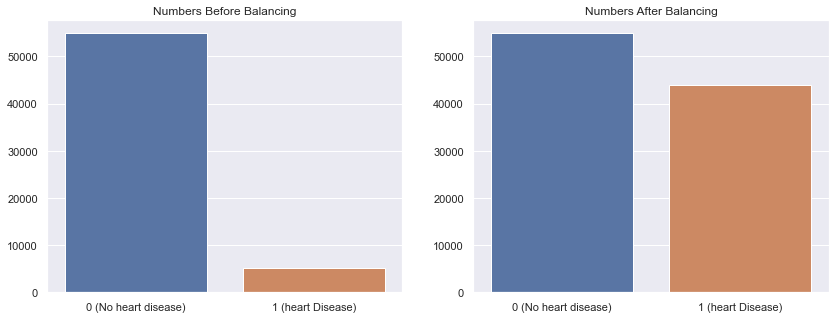

In [10]:
labels = ["0 (No heart disease)","1 (heart Disease)"]
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.barplot(labels, list(num_before_smote.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(labels, list(num_after_smote.values()))
plt.title("Numbers After Balancing")
plt.show()

In [24]:
#logistic model 
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


# X=df1.drop(columns=['HeartDisease'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=21)
#apply GridSearch
class_weight = ['balanced',None]
penalty = ['l2']
C = [0.01,0.1,1,10,100]
param_grid = dict(class_weight =class_weight, C = C, penalty = penalty)

logistic_clf = GridSearchCV(LogisticRegression(max_iter = 500),scoring='f1',param_grid=param_grid,cv=10)
logistic_clf.fit(X_train,y_train)
print("Best: %f using %s" % (logistic_clf.best_score_, logistic_clf.best_params_))



Best: 0.746450 using {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}


Accuracy is:76.27%
              precision    recall  f1-score   support

           0       0.74      0.81      0.78      9985
           1       0.79      0.71      0.75      9773

    accuracy                           0.76     19758
   macro avg       0.77      0.76      0.76     19758
weighted avg       0.77      0.76      0.76     19758



<AxesSubplot:>

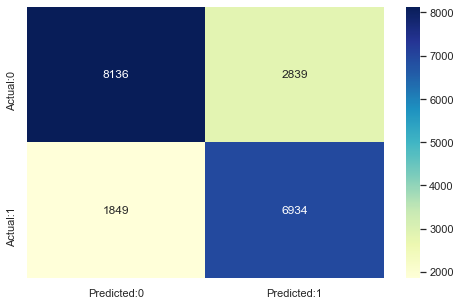

In [12]:
from sklearn.metrics import accuracy_score

y_predict_log = logistic_clf.predict(X_test)
log_accuracy = accuracy_score(y_test,y_predict_log)
print(f"Accuracy is:{round(log_accuracy*100,2)}%")
print(classification_report(y_predict_log, y_test))

cm=confusion_matrix(y_test,y_predict_log)
#stroe the accuracy and f1_score
log_acc = metrics.accuracy_score(y_test, y_predict_log)
log_f1 = metrics.f1_score(y_test, y_predict_log)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
# #predict the probability to get the heartdisease(when user provide x inputs)
# a=np.array([100.0,1.0,0.0,0.0,5.0,4.0,0.0]).reshape(1,-1)
# y_pred_prob = log_model.predict_proba(a)[::, 1]

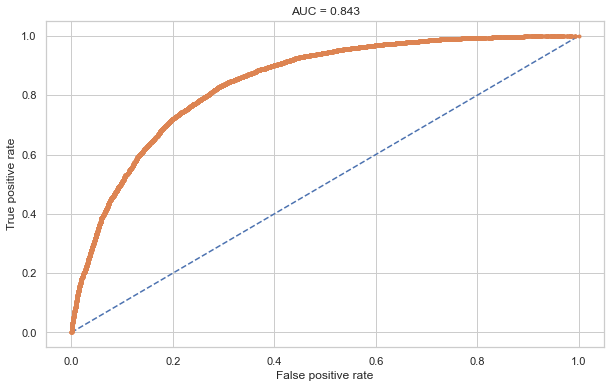

In [13]:
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

# calculate AUC and roc curve
prob = logistic_clf.predict_proba(X_test)
prob = prob[:, 1]
log_auc = roc_auc_score(y_test, prob)
fpr, tpr, thresholds = roc_curve(y_test, prob)


# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

In [14]:
#Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import class_weight

#apply GridSearch
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train,y_train)
print("Best: %f using %s" % (nbModel_grid.best_score_, nbModel_grid.best_params_))


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best: 0.734399 using {'var_smoothing': 0.0533669923120631}


Accuracy is:73.84%
              precision    recall  f1-score   support

           0       0.77      0.76      0.77     11061
           1       0.70      0.71      0.70      8697

    accuracy                           0.74     19758
   macro avg       0.73      0.74      0.73     19758
weighted avg       0.74      0.74      0.74     19758

0.7043478260869565


<AxesSubplot:>

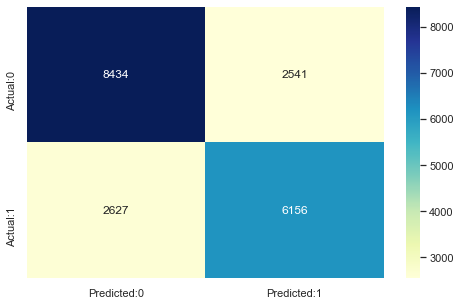

In [15]:
from sklearn.metrics import accuracy_score

y_predict_NB = nbModel_grid.predict(X_test)
NB_accuracy = accuracy_score(y_test,y_predict_NB)
print(f"Accuracy is:{round(NB_accuracy*100,2)}%")
print(classification_report(y_predict_NB, y_test))

cm=confusion_matrix(y_test,y_predict_NB)
#store accuracy and f1_score
NB_acc = metrics.accuracy_score(y_test, y_predict_NB)
NB_f1 = metrics.f1_score(y_test, y_predict_NB)
print(NB_f1)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

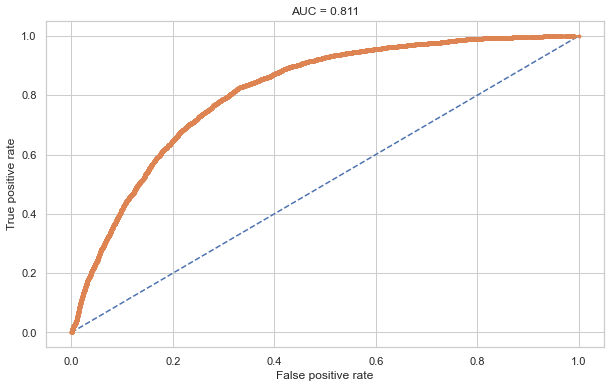

In [16]:
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

# calculate AUC and roc curve
prob = nbModel_grid.predict_proba(X_test)
prob = prob[:, 1]
NB_auc = roc_auc_score(y_test, prob)
fpr, tpr, thresholds = roc_curve(y_test, prob)


# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(NB_auc,3)}")
plt.show()

In [17]:
#Tree model
#Tree model
from sklearn.tree import DecisionTreeClassifier 
#apply grid search
min_samples_split = [2, 3, 4, 5, 6, 7]
min_samples_leaf = [1,2,3,4,5,6]
max_features = ['sqrt', 'log2']
param_grid = dict(min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf, max_features = max_features)
tree_clf = GridSearchCV(DecisionTreeClassifier(random_state=21), param_grid=param_grid, n_jobs=-1)

tree_clf.fit(X_train,y_train)
print("Best: %f using %s" % (tree_clf.best_score_, tree_clf.best_params_))


Best: 0.856109 using {'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


Accuracy is:86.89%
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     10676
           1       0.87      0.84      0.85      9082

    accuracy                           0.87     19758
   macro avg       0.87      0.87      0.87     19758
weighted avg       0.87      0.87      0.87     19758

0.8549678141617689


<AxesSubplot:>

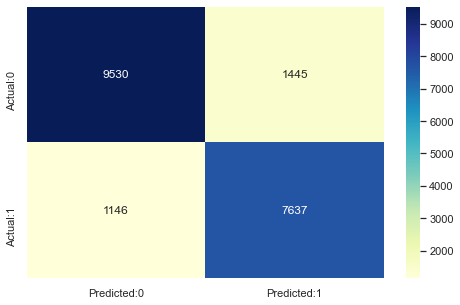

In [18]:

y_predict_tree = tree_clf.predict(X_test)
tree_accuracy = accuracy_score(y_test,y_predict_tree)
print(f"Accuracy is:{round(tree_accuracy*100,2)}%")
print(classification_report(y_predict_tree, y_test))

cm=confusion_matrix(y_test,y_predict_tree)
#stroe accuracy and f1_socre
tree_acc = metrics.accuracy_score(y_test, y_predict_tree)
tree_f1 = metrics.f1_score(y_test, y_predict_tree)
print(tree_f1)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

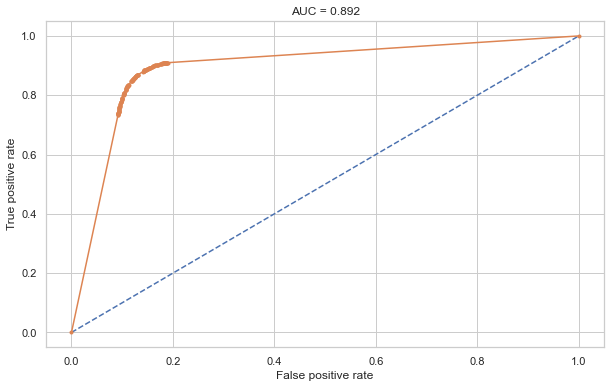

In [19]:
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

# calculate AUC and roc curve
probs = tree_clf.predict_proba(X_test)
probs = probs[:, 1]
tree_auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)


# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(tree_auc,3)}")
plt.show()

In [20]:
# #Random Forest
from sklearn.ensemble import RandomForestClassifier
model_random_forest = RandomForestClassifier(n_estimators=500)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
GS_random_forest = GridSearchCV(estimator=model_random_forest, param_grid=param_grid, cv= 5)
GS_random_forest.fit(X_train,y_train)
print("Best: %f using %s" % (GS_random_forest.best_score_, GS_random_forest.best_params_))
# y_pred_random_forest = model_random_forest.predict(X_test)
# print(confusion_matrix(y_test, y_pred_random_forest))
# print(classification_report(y_pred_tree, y_pred_random_forest))
# from sklearn.ensemble import RandomForestClassifier
# rf_model = RandomForestClassifier()
# rf_model.fit(X_train, y_train)
# y_pred = rf_model.predict(X_test)
# y_pred_prob = rf_model.predict_proba(X_test)[::, 1]
# print(confusion_matrix(y_test, y_pred))


Best: 0.785796 using {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 200}


[[0.52097731 0.47902269]]


/Users/jinkezhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuracy is:78.84%
              precision    recall  f1-score   support

           0       0.79      0.82      0.81     10627
           1       0.78      0.75      0.77      9131

    accuracy                           0.79     19758
   macro avg       0.79      0.79      0.79     19758
weighted avg       0.79      0.79      0.79     19758

0.7666629451825389


<AxesSubplot:>

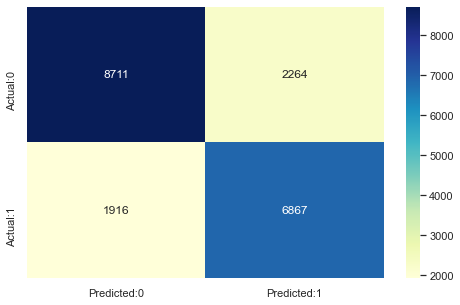

In [21]:
import pickle
prediction = a=np.array([1.0,1.0,0.0,0.0,.0,4.0,0.0,0,1,0,0,0,0,0,0,0,0]).reshape(1,-1)
print(GS_random_forest.predict_proba(prediction))
pickle.dump(GS_random_forest, open("model1.pkl", "wb"))

y_predict_random = GS_random_forest.predict(X_test)
random_accuracy = accuracy_score(y_test,y_predict_random)
print(f"Accuracy is:{round(random_accuracy*100,2)}%")
print(classification_report(y_predict_random, y_test))

cm=confusion_matrix(y_test,y_predict_random)
#stroe accuracy and f1_socre
random_acc = metrics.accuracy_score(y_test, y_predict_random)
random_f1 = metrics.f1_score(y_test, y_predict_random)
print(random_f1)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

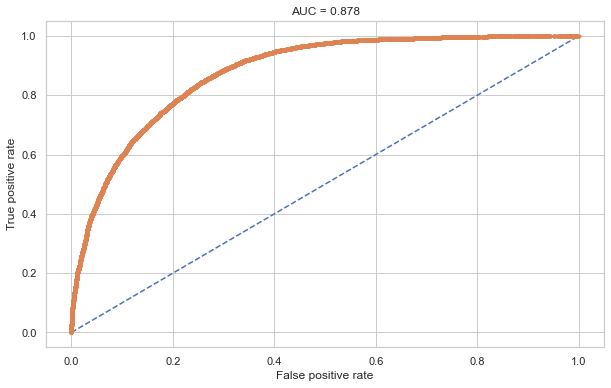

In [22]:
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

# calculate AUC and roc curve
probs = GS_random_forest.predict_proba(X_test)
probs = probs[:, 1]
tree_auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)


# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(tree_auc,3)}")
plt.show()

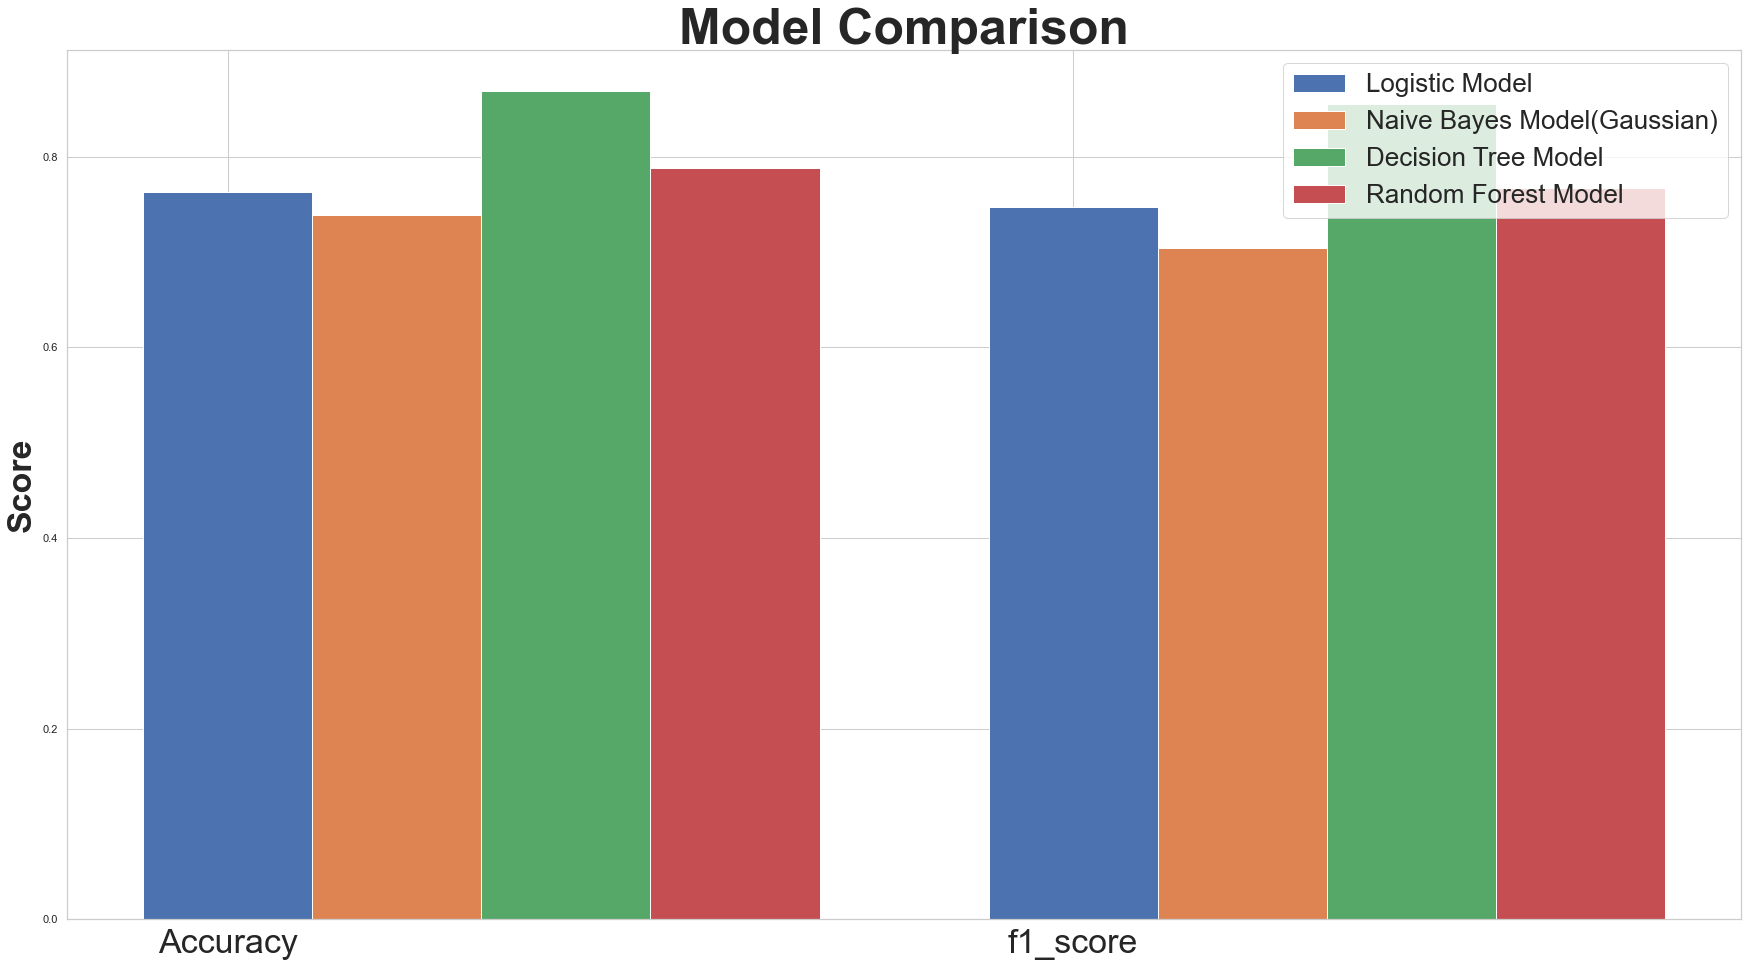

<Figure size 2160x1152 with 0 Axes>

In [23]:
#Plot to compare accuracy, precision and recall of the three models; we decide to use logistic model at last
plt.title('Model Comparison', fontsize=50, fontweight='bold')



barWidth = 0.2
log_score = [log_acc, log_f1]
NB_score = [NB_acc, NB_f1]
tree_score = [tree_acc, tree_f1]
random_score = [random_acc,random_f1]

r1 = np.arange(len(log_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.bar(r1, log_score, width=barWidth, edgecolor='white', label='Logistic Model')
plt.bar(r2, NB_score, width=barWidth, edgecolor='white', label='Naive Bayes Model(Gaussian)')
plt.bar(r3, tree_score, width=barWidth, edgecolor='white', label='Decision Tree Model')
plt.bar(r4, random_score, width=barWidth, edgecolor='white', label='Random Forest Model')


plt.ylabel('Score', fontweight='bold',fontsize=34)
labels = ['Accuracy', 'f1_score']
plt.xticks(range(0,2,1),labels,fontsize=34)


plt.legend(fontsize=26)
plt.show()
plt.savefig('model_compare.jpg')